# Heart Failure Prediction   


# Objective:
* In this Notebook we will do some **EDA** (Exploratory Data Analysis) on the the Heart Failure Prediction Dataset
(https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) and try different classification models to predict if there is a heart failure chance for each person in the data



<div style='color: #D10000;
           background-color: #000000;
           font-size: 200%;
           border-radius:15px;
           margin-top: 5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Data Dictionary
<a class="anchor" id="1"></a> 

- **Age:** age of the patient [years]
- **Sex:** sex of the patient [M: Male, F: Female]
- **ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP:** resting blood pressure [mm Hg]
- **Cholesterol:** serum cholesterol [mm/dl]
- **FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]
- **Oldpeak:** oldpeak = ST [Numeric value measured in depression]
- **ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease:** output class [1: heart disease, 0: Normal]

<div style='color: #D10000;
           background-color: #000000;
           font-size: 200%;
           border-radius:15px;
           margin-top: 5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Import Libraries
<a class="anchor" id="1"></a> 

In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",50)
from sklearn import preprocessing
import matplotlib as mpl
mpl.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import keras.backend as K
import tensorflow as tf

sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [15,10]

<div style='color: #D10000;
           background-color: #000000;
           font-size: 200%;
           border-radius:15px;
           margin-top: 5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Exploratory Data Analysis
<a class="anchor" id="1"></a> 

In [2]:
df = pd.read_csv("../input/heart-failure-prediction/heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Check Null Values

In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.describe(include = 'O')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


# Check the correlation between the features

<AxesSubplot:>

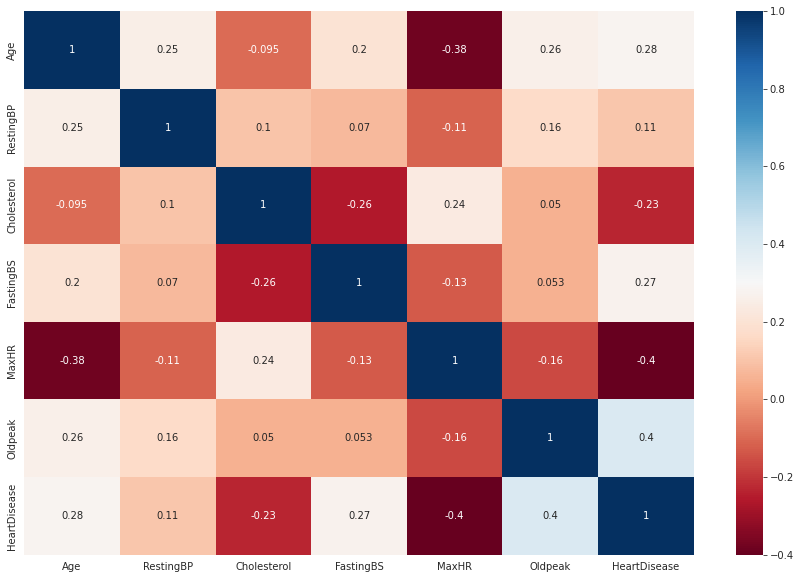

In [8]:
correlation = df.corr()
sns.heatmap(correlation, annot= True, cmap = 'RdBu')

Text(0.5, 1.0, 'Distribution of Heart Diseases over Age')

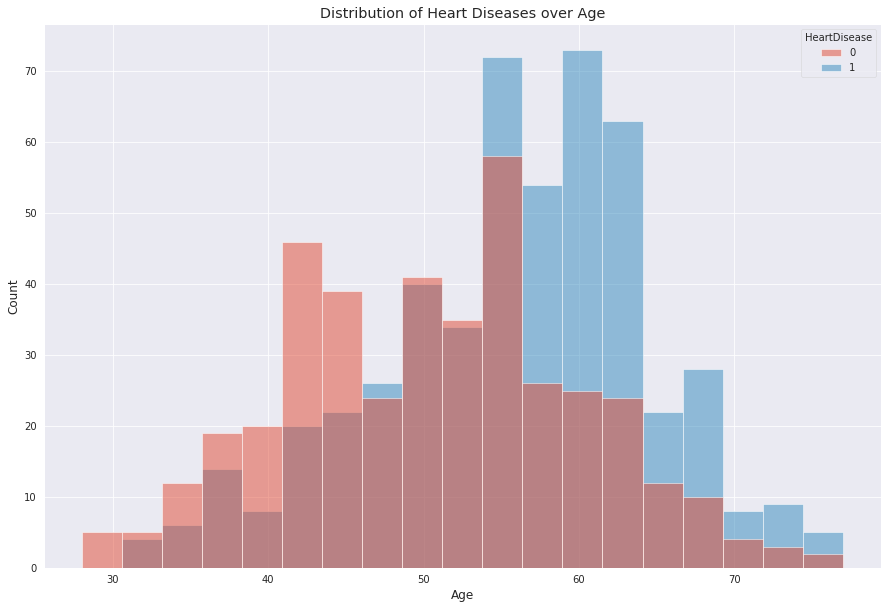

In [9]:
sns.histplot(data = df ,x = 'Age', hue = 'HeartDisease')
plt.title("Distribution of Heart Diseases over Age")

In [10]:
px.histogram(data_frame = df, x = 'Sex', color = 'HeartDisease', title="Distribution of Heart Diseases over Sex",barmode="group")

Text(0.5, 1.0, 'Distribution of Heart Diseases over RestingECG')

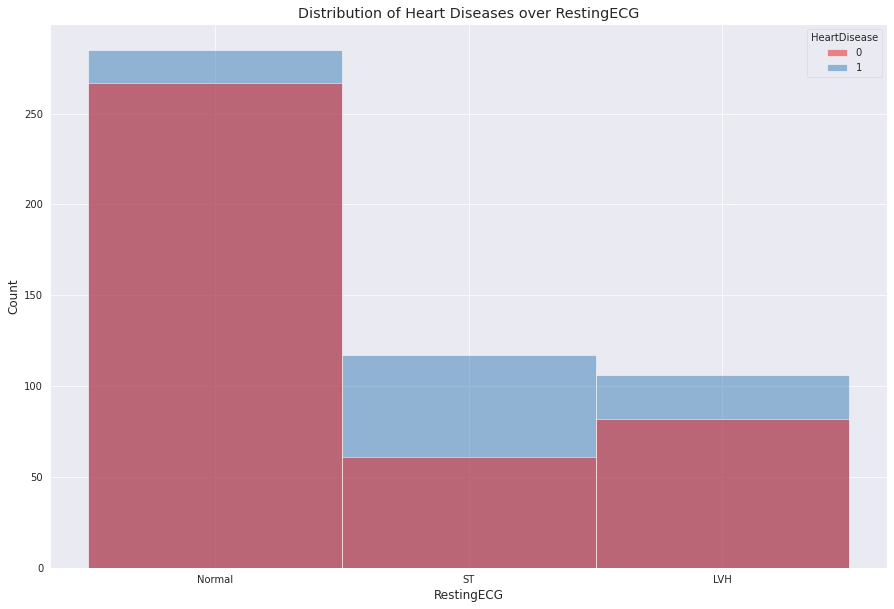

In [11]:
sns.histplot(data = df ,x = 'RestingECG', hue = 'HeartDisease',palette = 'Set1')
plt.title("Distribution of Heart Diseases over RestingECG")

In [12]:
px.histogram(data_frame = df, x = 'ChestPainType', color = 'HeartDisease', title="Distribution of Heart Diseases over ChestPainType",barmode="group")


[]

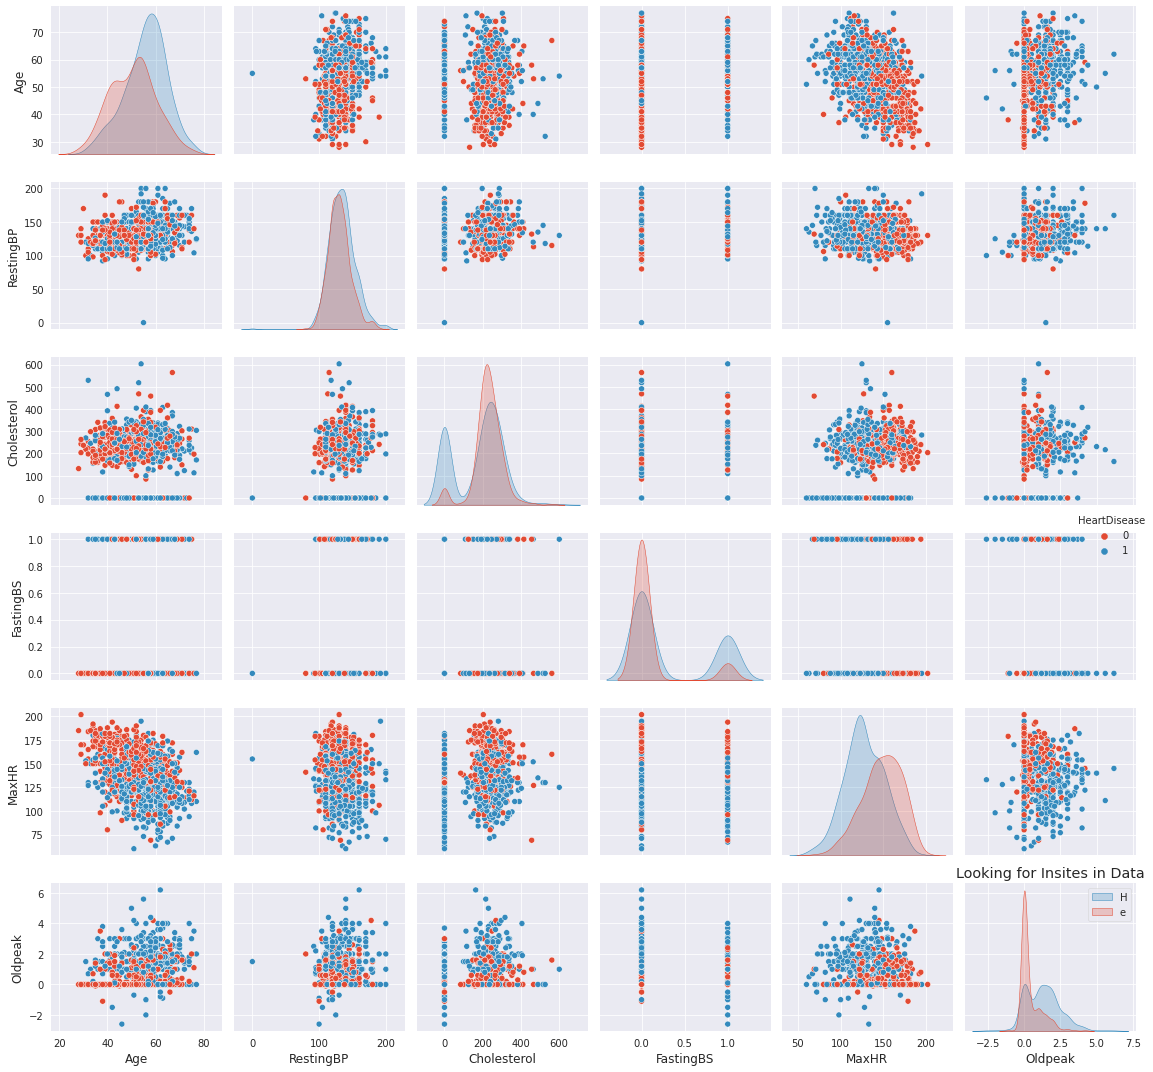

In [13]:
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

# **Check the Distribution and Skewness of the features**

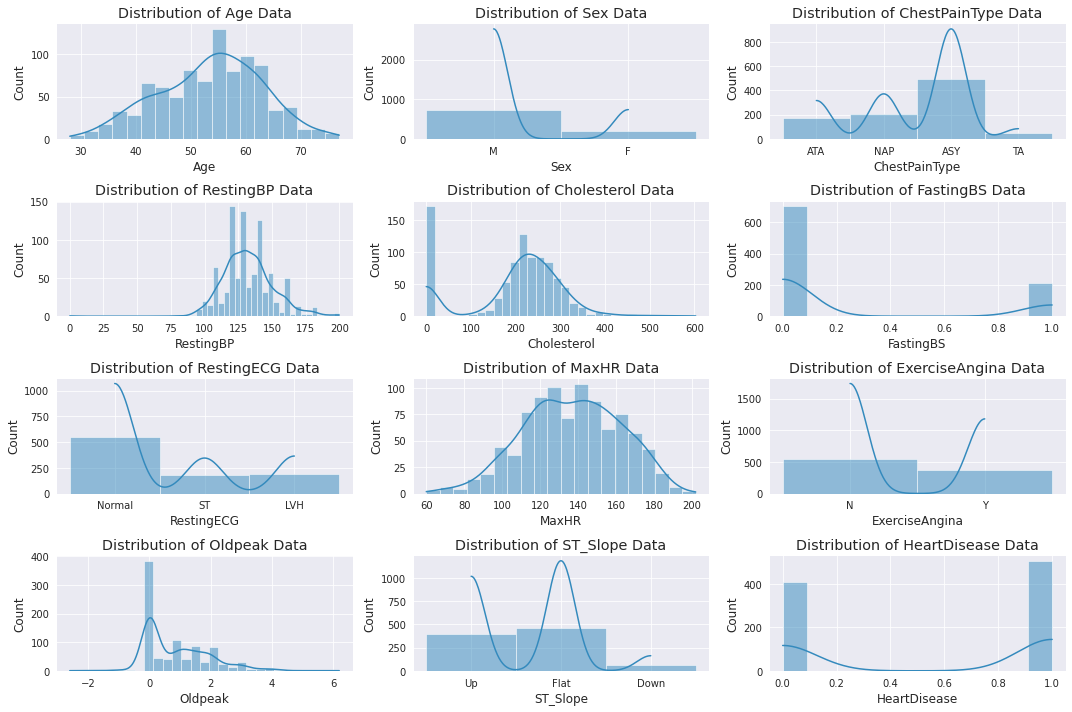

In [14]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

# Check the Outliers using Box Plots

In [15]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP")
fig.show()

In [16]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age",color="Sex")
fig.show()

In [17]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol",color="Sex")
fig.show()

In [18]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [19]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR",color="Sex")
fig.show()

# Robust Scaler will be used later to prevent the outliers from causing training problems to Non-Tree algorithims

In [20]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [21]:
object_columns = df.select_dtypes(include='object').columns.tolist()
object_columns

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [22]:
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
target = 'HeartDisease'

In [23]:
X = df[features]
y = df[target]

# **Encoding**

In [24]:
encoder = LabelEncoder()
X = X.apply(encoder.fit_transform)
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1
914,40,1,0,45,51,1,1,67,0,42,1
915,29,1,0,31,9,0,1,41,1,22,1
916,29,0,1,31,94,0,0,100,0,10,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify = y)

<div style='color: #D10000;
           background-color: #000000;
           font-size: 200%;
           border-radius:15px;
           margin-top: 5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Modelling
<a class="anchor" id="1"></a> 

# Tree Algorithims

In [26]:
feature_col_tree= X_train.columns.to_list()

In [27]:
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 15
from sklearn.ensemble import RandomForestClassifier

In [28]:
predictors = feature_col_tree
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validate(alg, dtrain[predictors], y_train, cv=cv_folds, scoring='accuracy')
    
    accuracy = metrics.accuracy_score(np.array(y_train),np.array(dtrain_predictions))
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : \n" + f'{accuracy}')
    #print ("AUC Score (Train): %f" + f'{metrics.roc_auc_score(dtrain['Decision'], dtrain_predprob)})
    
    if performCV:
         print ("CV Score :" f'{cv_score}')
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

# Gradient Boosting Trees


Model Report
Accuracy : 
0.9578488372093024
CV Score :{'fit_time': array([0.1039691 , 0.10426116, 0.10224724, 0.10320449, 0.10550547,
       0.10321593, 0.10570312, 0.10283303, 0.10275078, 0.10319066]), 'score_time': array([0.00202727, 0.00188923, 0.00196123, 0.00192738, 0.00191164,
       0.00189972, 0.00194192, 0.00190711, 0.00194478, 0.0019958 ]), 'test_score': array([0.85507246, 0.7826087 , 0.86956522, 0.89855072, 0.82608696,
       0.86956522, 0.86956522, 0.84057971, 0.82352941, 0.83823529])}


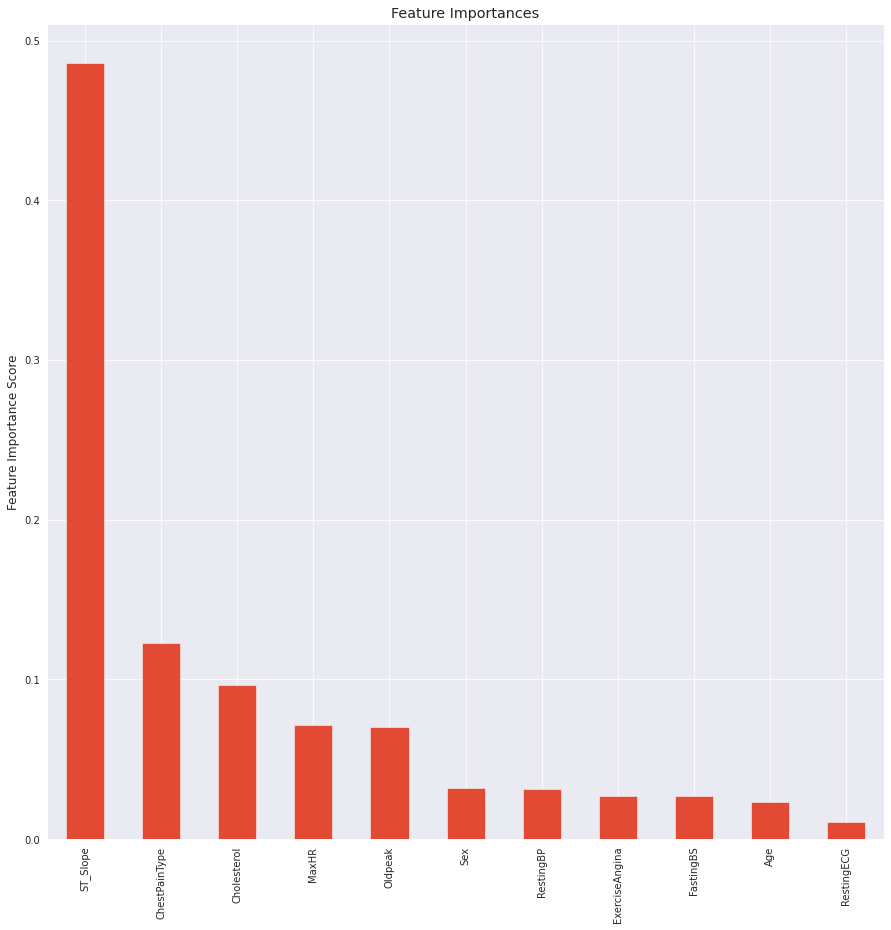

In [29]:
gbc = GradientBoostingClassifier(random_state=10)
modelfit(gbc, X_train, predictors)

In [30]:
param_test = {'max_features':range(2,6,2)}
gsearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 60,max_depth = 9, min_samples_split = 15, subsample = 0.8, random_state=10),
param_grid = param_test, scoring='accuracy',n_jobs = -1,iid=False, cv=10)
gsearch.fit(X_train ,y_train)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_depth=9,
                                                  min_samples_split=15,
                                                  n_estimators=60,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=-1, param_grid={'max_features': range(2, 6, 2)},
             scoring='accuracy')


Model Report
Accuracy : 
1.0
CV Score :{'fit_time': array([0.11052108, 0.11114001, 0.10784316, 0.11184955, 0.11322045,
       0.11001182, 0.11412883, 0.11253619, 0.11191821, 0.11346316]), 'score_time': array([0.00213814, 0.00237346, 0.00207114, 0.0021174 , 0.00207949,
       0.00209069, 0.00212741, 0.00205636, 0.00205183, 0.00218225]), 'test_score': array([0.82608696, 0.85507246, 0.88405797, 0.91304348, 0.8115942 ,
       0.86956522, 0.84057971, 0.84057971, 0.82352941, 0.80882353])}


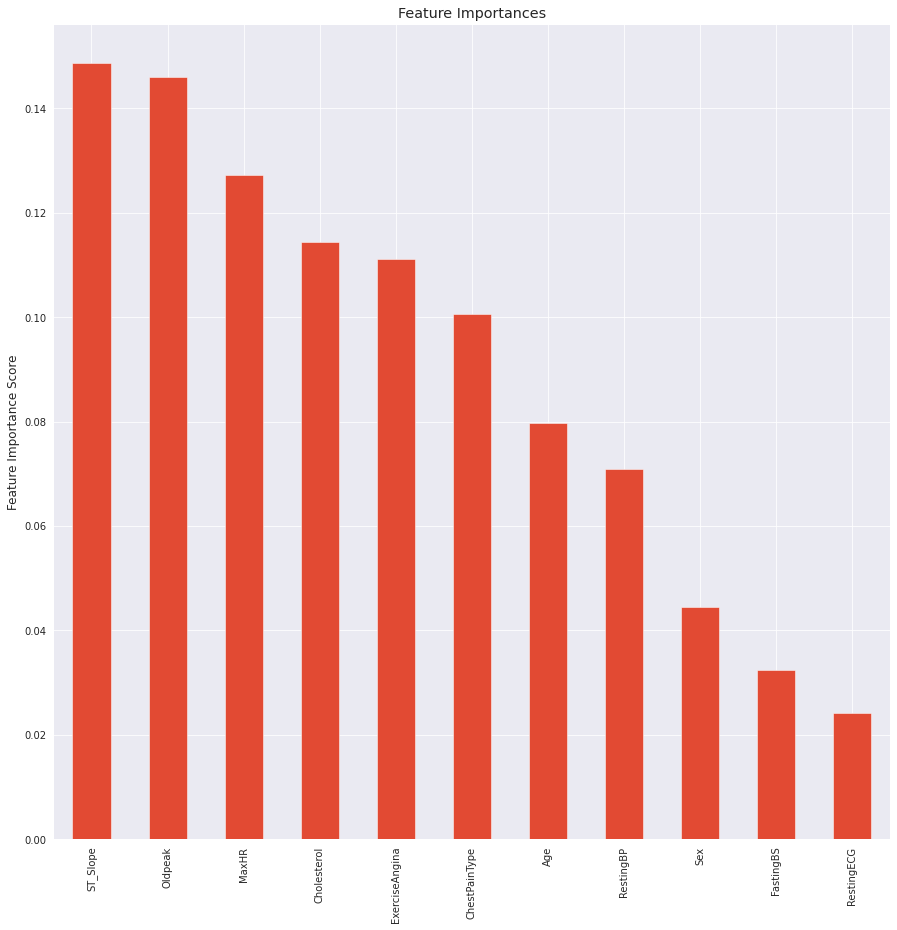

In [31]:
modelfit(gsearch.best_estimator_, X_train, predictors)

In [32]:
param_test2 = {'min_samples_split':range(10,500,20),'learning_rate':np.arange(0.02, 0.1, 0.02),'max_features':range(2,6,2)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(max_features=4,n_estimators=100,max_depth=10,min_samples_leaf=40, random_state=10),
                        param_grid = param_test2, 
                        scoring='accuracy',
                        iid=False,
                        cv=10)
gsearch2.fit(X_train ,y_train)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_depth=10, max_features=4,
                                                  min_samples_leaf=40,
                                                  random_state=10),
             iid=False,
             param_grid={'learning_rate': array([0.02, 0.04, 0.06, 0.08]),
                         'max_features': range(2, 6, 2),
                         'min_samples_split': range(10, 500, 20)},
             scoring='accuracy')


Model Report
Accuracy : 
0.9127906976744186
CV Score :{'fit_time': array([0.06337571, 0.06245947, 0.06253529, 0.06349349, 0.06131172,
       0.06248116, 0.06302071, 0.06324267, 0.06262565, 0.06202435]), 'score_time': array([0.00197053, 0.00199318, 0.00197315, 0.00192022, 0.00195813,
       0.00200486, 0.0020144 , 0.00203872, 0.00188661, 0.00208783]), 'test_score': array([0.85507246, 0.85507246, 0.85507246, 0.94202899, 0.82608696,
       0.85507246, 0.88405797, 0.89855072, 0.83823529, 0.86764706])}


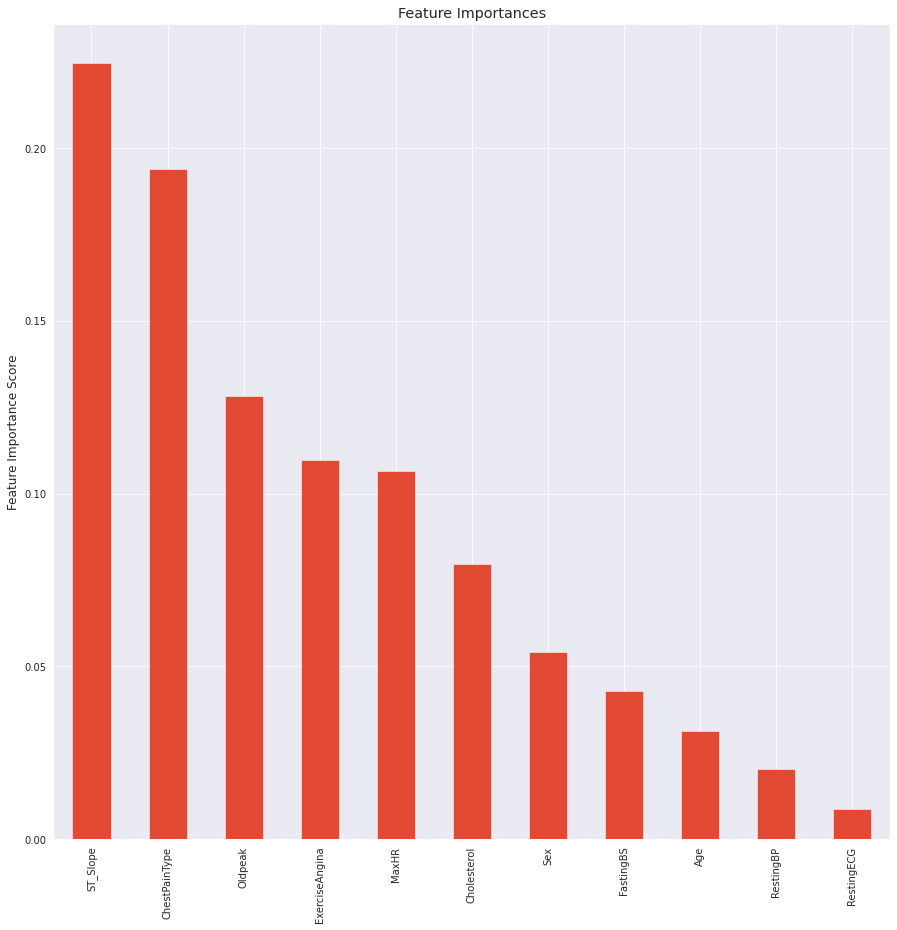

In [33]:
modelfit(gsearch2.best_estimator_, X_train, predictors)

# Random Forest Classifier

In [34]:
rf_param_test3 = {'min_samples_split':range(30,50,10),'min_samples_leaf':range(4,20,4),'max_depth':range(5,12,3)}
rf_gsearch = GridSearchCV(estimator = RandomForestClassifier(max_features=10,n_estimators=100, random_state=10),
                        param_grid = rf_param_test3 , 
                        scoring='accuracy',
                        iid=False,
                        cv=10)
rf_gsearch.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features=10, random_state=10),
             iid=False,
             param_grid={'max_depth': range(5, 12, 3),
                         'min_samples_leaf': range(4, 20, 4),
                         'min_samples_split': range(30, 50, 10)},
             scoring='accuracy')


Model Report
Accuracy : 
0.8822674418604651
CV Score :{'fit_time': array([0.16899347, 0.16906118, 0.1689508 , 0.17516398, 0.16993189,
       0.17037511, 0.17008471, 0.16930819, 0.17785501, 0.17119479]), 'score_time': array([0.00883675, 0.00883317, 0.0136075 , 0.00879025, 0.00910378,
       0.00886989, 0.00919676, 0.00884104, 0.00894356, 0.00885963]), 'test_score': array([0.86956522, 0.8115942 , 0.84057971, 0.86956522, 0.85507246,
       0.8115942 , 0.85507246, 0.88405797, 0.80882353, 0.80882353])}


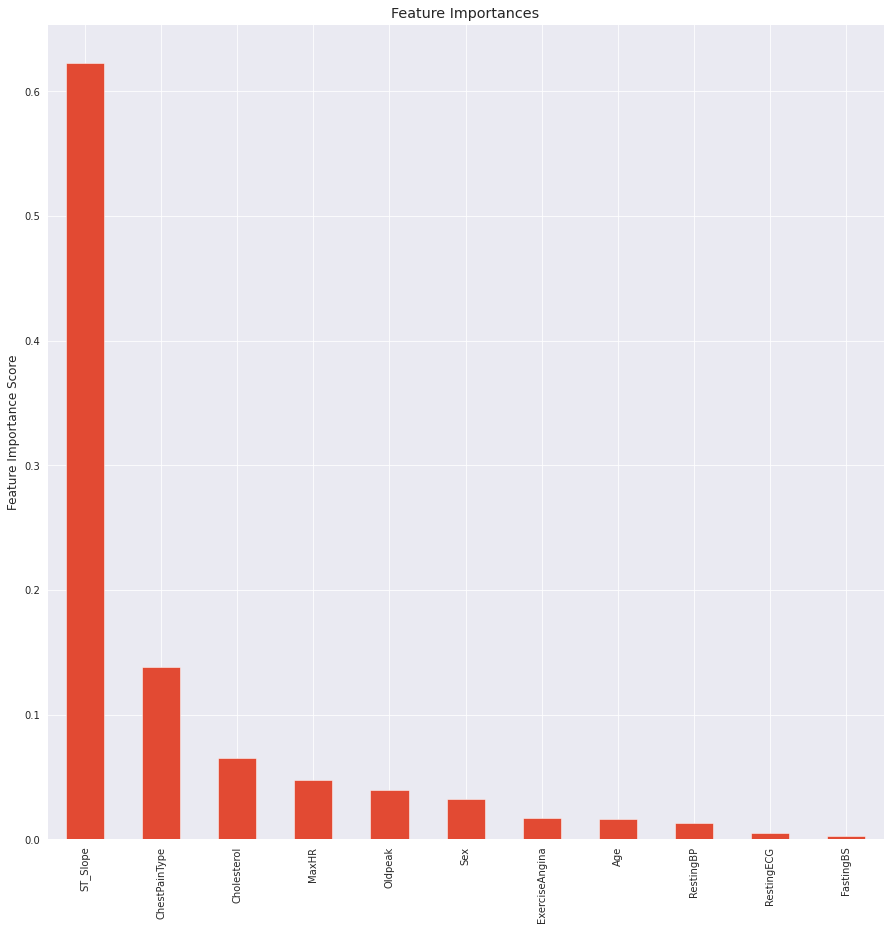

In [35]:
modelfit(rf_gsearch.best_estimator_, X_train, predictors)

# Try the best tree model on test data

In [36]:
Y_pred = gsearch.best_estimator_.predict(X_test)

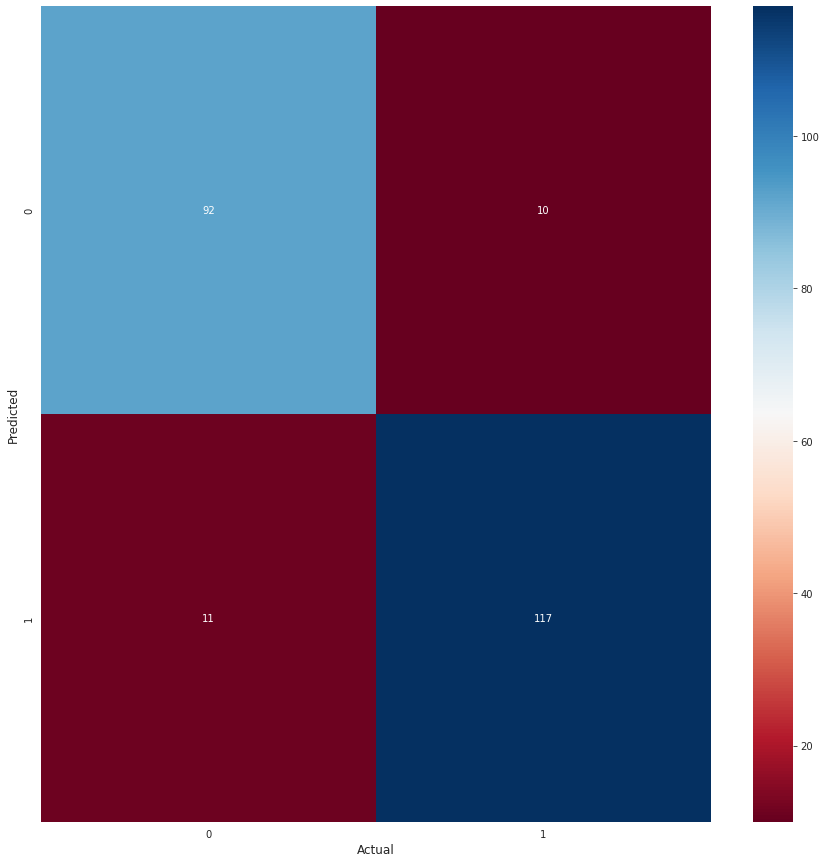

In [37]:
cm = confusion_matrix(Y_pred,y_test)
plt.figure()
sns.heatmap(cm, annot = True,fmt='d' ,cmap='RdBu')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred, target_names = ['Safe','Failure']))

              precision    recall  f1-score   support

        Safe       0.90      0.89      0.90       103
     Failure       0.91      0.92      0.92       127

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230



# Non - Tree Algorithims

**One Hot Encoding**

In [39]:
## Creaeting one hot encoded features for working with non tree based algorithms 
X2 = pd.get_dummies(X,columns = object_columns,drop_first=False)
X2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,12,41,147,0,98,10,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,21,55,40,0,82,20,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,9,31,141,0,25,10,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,20,39,72,0,34,25,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,26,49,53,0,48,10,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.15, random_state=42,stratify = y)

In [41]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
887,15,33,105,1,69,11,0,1,1,0,0,0,1,0,0,0,1,0,1,0
815,40,21,135,0,77,20,0,1,0,0,1,0,0,1,0,1,0,0,0,1
754,29,33,65,0,94,10,0,1,1,0,0,0,0,1,0,0,1,0,0,1
876,32,31,64,0,58,34,0,1,1,0,0,0,1,0,0,0,1,0,1,0
400,22,55,0,1,36,10,1,0,1,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,18,22,88,0,76,10,0,1,0,0,1,0,0,1,0,1,0,0,0,1
567,43,31,79,0,41,10,0,1,1,0,0,0,0,0,1,0,1,0,1,0
458,33,35,0,1,14,25,0,1,1,0,0,0,0,0,1,1,0,0,1,0
252,33,26,150,0,41,10,0,1,1,0,0,0,0,0,1,0,1,0,0,1


**Robust Scaler**

In [42]:
scaler = preprocessing.RobustScaler()
scaler = scaler.fit(X_train)

In [43]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_train = pd.DataFrame(X_train, columns = X2.columns)
X_test = pd.DataFrame(X_test, columns = X2.columns)

In [45]:
predictors = X_train.columns

# K-NN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier



rf_param_test4 = {'n_neighbors':range(3,12,2)}
knn_gsearch = GridSearchCV(estimator = KNeighborsClassifier(),
                        param_grid = rf_param_test4 , 
                        scoring='accuracy',
                        iid=False,
                        cv=10)
knn_gsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), iid=False,
             param_grid={'n_neighbors': range(3, 12, 2)}, scoring='accuracy')

In [47]:
modelfit(knn_gsearch.best_estimator_, X_train, predictors, printFeatureImportance = False)


Model Report
Accuracy : 
0.8897435897435897
CV Score :{'fit_time': array([0.00298929, 0.00261569, 0.00261283, 0.0025692 , 0.00256872,
       0.00258613, 0.00264931, 0.00269699, 0.00265813, 0.00263548]), 'score_time': array([0.00517273, 0.00521684, 0.00513434, 0.00511575, 0.00507522,
       0.00501347, 0.00545597, 0.00519013, 0.00517845, 0.00513768]), 'test_score': array([0.84615385, 0.85897436, 0.88461538, 0.83333333, 0.83333333,
       0.88461538, 0.87179487, 0.84615385, 0.80769231, 0.85897436])}


# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression


rf_param_test5 = {'warm_start':[True,False]}
LR_gsearch = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = rf_param_test5 , 
                        scoring='accuracy',
                        iid=False,
                        cv=10)
LR_gsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), iid=False,
             param_grid={'warm_start': [True, False]}, scoring='accuracy')

In [49]:
modelfit(LR_gsearch.best_estimator_, X_train, predictors, printFeatureImportance = False)


Model Report
Accuracy : 
0.8576923076923076
CV Score :{'fit_time': array([0.01372385, 0.01380968, 0.01435637, 0.01495242, 0.01431179,
       0.0146687 , 0.01361108, 0.01393604, 0.0155189 , 0.01438785]), 'score_time': array([0.00270486, 0.00267649, 0.00269198, 0.00267291, 0.00272942,
       0.00267148, 0.00270295, 0.00271034, 0.00282884, 0.00271106]), 'test_score': array([0.88461538, 0.84615385, 0.88461538, 0.82051282, 0.85897436,
       0.88461538, 0.87179487, 0.82051282, 0.75641026, 0.83333333])}


# Deep Learning - Artificial Neural Networks

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [51]:
model = Sequential()


model.add(Dense(units=20,activation='relu'))

model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=5,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics= 'accuracy')

2022-12-21 02:51:38.865932: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 02:51:38.867154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 02:51:38.867818: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 02:51:38.868755: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [52]:
model.fit(X_train, 
          y_train, 
          epochs=100,
          callbacks = [callback],
          validation_data=(X_test, y_test), verbose=1
          )

2022-12-21 02:51:41.932627: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
25/25 [==============================] - 2s 10ms/step - loss: 0.6832 - accuracy: 0.4679 - val_loss: 0.6681 - val_accuracy: 0.5362
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6154 - val_loss: 0.6334 - val_accuracy: 0.6739
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6106 - accuracy: 0.7256 - val_loss: 0.5941 - val_accuracy: 0.7101
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5723 - accuracy: 0.7731 - val_loss: 0.5622 - val_accuracy: 0.7754
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.8051 - val_loss: 0.5420 - val_accuracy: 0.8116
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.8282 - val_loss: 0.5273 - val_accuracy: 0.8406
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5118 - accuracy: 0.8410 - val_loss: 0.5170 - val_accuracy: 0.8406
Epoch 8/100


# Looks like the best 2 models are Gradient boosting trees and ANN for this dataset :) 